In [2]:
import os
import sys
sys.path.append("..")
import pickle

from dataset_dataloader import ImageDataset
from arguments import prepare_parser
from vae_model.vae import VaeModel
from utils import load_checkpoint_model_for_eval
from analysis import get_n_data_samples_x_y, plot_prior_analysis_grid #, plot_gen_sample_class_proportions

import torch

%matplotlib inline
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'

# Load relevant checkpoints

In [3]:
checkpoint_dir = "../run_files/checkpoints"
checkpoint_dict = dict()

for i, c in enumerate(os.listdir(checkpoint_dir)):
    if "2021-09-22" in c:
        print(i, c)
        checkpoint_dict[i] = c

0 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:07:15.pt
1 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:07:15.pt
2 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) conditional_made_decoder - 2021-09-22-11:11:15.pt
3 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:31:20.pt
4 q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:48:20.pt
5 q(z|x) basic_mlp_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
6 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
7 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) conditional_made_decoder - 2021-09-22-11:50:42.pt
8 q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_deconv_decoder - 2021-09-22-11:50:42.pt
9 q(z|x) basic_mlp_encoder -

# Plot some data samples

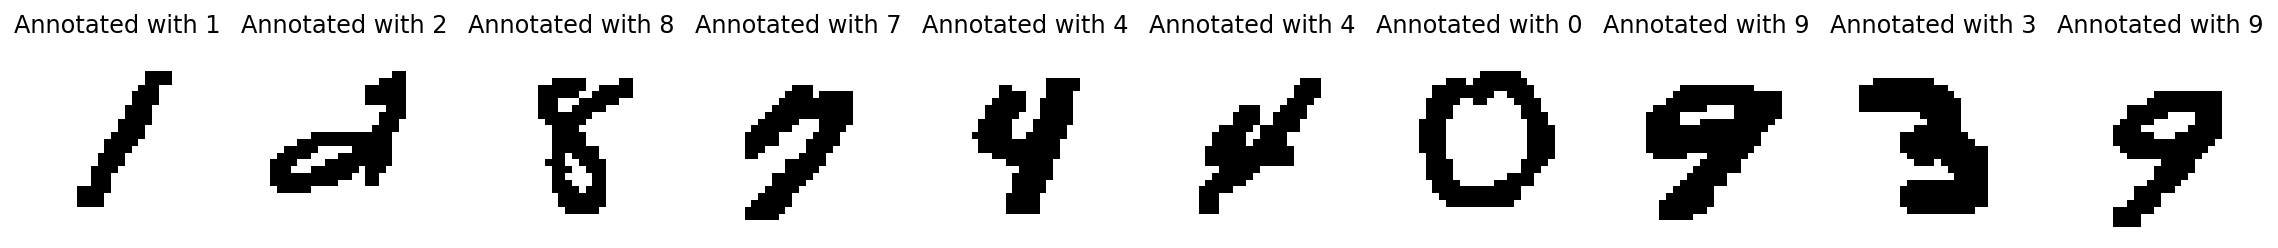

In [4]:
n_samples = 10
data_X, data_y = get_n_data_samples_x_y(image_dataset_name="bmnist", N_samples=n_samples)

fig, axs = plt.subplots(ncols=n_samples, figsize=(2*n_samples, 2))
for i in range(n_samples):
    axs[i].imshow(data_X[i, 0, :, :], cmap='Greys')
    axs[i].set_title(f"Annotated with {data_y[i]}")
    axs[i].axis('off')

In [5]:
# KNN
knn_model = pickle.load(open('knnclassifier.pickle', 'rb'))

/home/cbarkhof/.conda/envs/thesisenv/lib/python3.6/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator KNeighborsClassifier from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


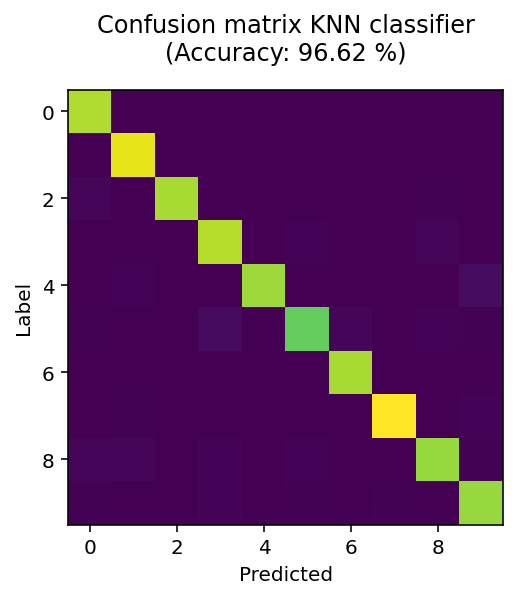

In [6]:
import pickle
from sklearn.metrics import confusion_matrix

f = "knn-validation-preds-labels.p"

if os.path.isfile(f):
    d = pickle.load( open( f, "rb" ) )
    preds, labels = d["preds"], d["labels"]
    
    acc = (labels == preds).sum() / len(labels) * 100

    # row is label, column is prediction
    conf = confusion_matrix(labels, preds)
    plt.xlabel("Predicted")
    plt.ylabel("Label")
    plt.title(f"Confusion matrix KNN classifier\n(Accuracy: {acc:.2f} %)", y=1.04)
    plt.imshow(conf)
    plt.savefig("performance-confusion-KNN-classifier.png", dpi=300)

# Prior analysis grid

In [7]:
# PLOT SAVING
plot_dir = "prior-plots"
os.makedirs(plot_dir, exist_ok=True)

# DATA
data_X, data_y = get_n_data_samples_x_y(image_dataset_name="bmnist", N_samples=1000)

In [8]:
# MAKE PRIOR GRID PLOTS
for C_N in range(12):
    checkpoint_path = f"{checkpoint_dir}/{checkpoint_dict[C_N]}"
    print(C_N, checkpoint_dict[C_N])
    print("-"*50)

    vae_model = load_checkpoint_model_for_eval(checkpoint_path)

    clean_name = checkpoint_dict[C_N].split("- 2021")[0]
    
    r = plot_prior_analysis_grid(vae_model=vae_model, plot_name=clean_name, plot_dir=plot_dir, 
                                 knn_classifier=knn_model, data_X=data_X, data_y=data_y,
                                 n_recon_samples=5, gen_batch_size=100, gen_n_batches=10)
    
    print(r.keys())
    break

0 q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:07:15.pt
--------------------------------------------------


RuntimeError: Error(s) in loading state_dict for VaeModel:
	Missing key(s) in state_dict: "gen_model.prior_z_means", "gen_model.prior_z_scales". 

q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:07:15.pt
--------------------------------------------------
best val loss 83.31


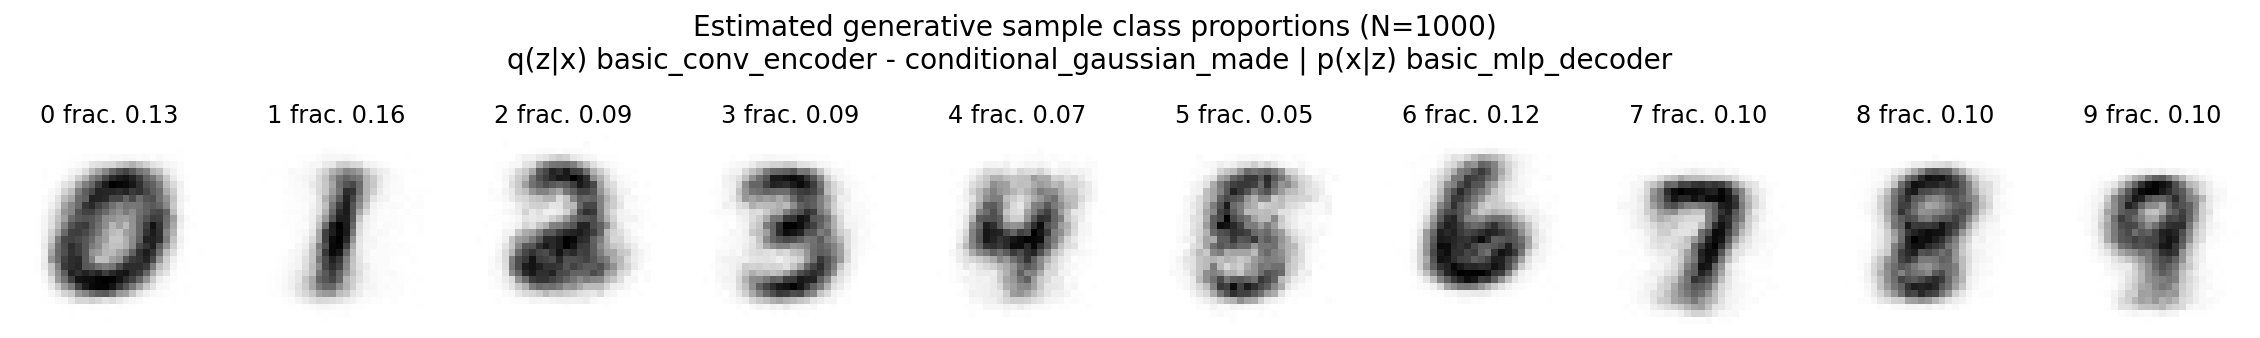

q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:07:15.pt
--------------------------------------------------
best val loss 83.29


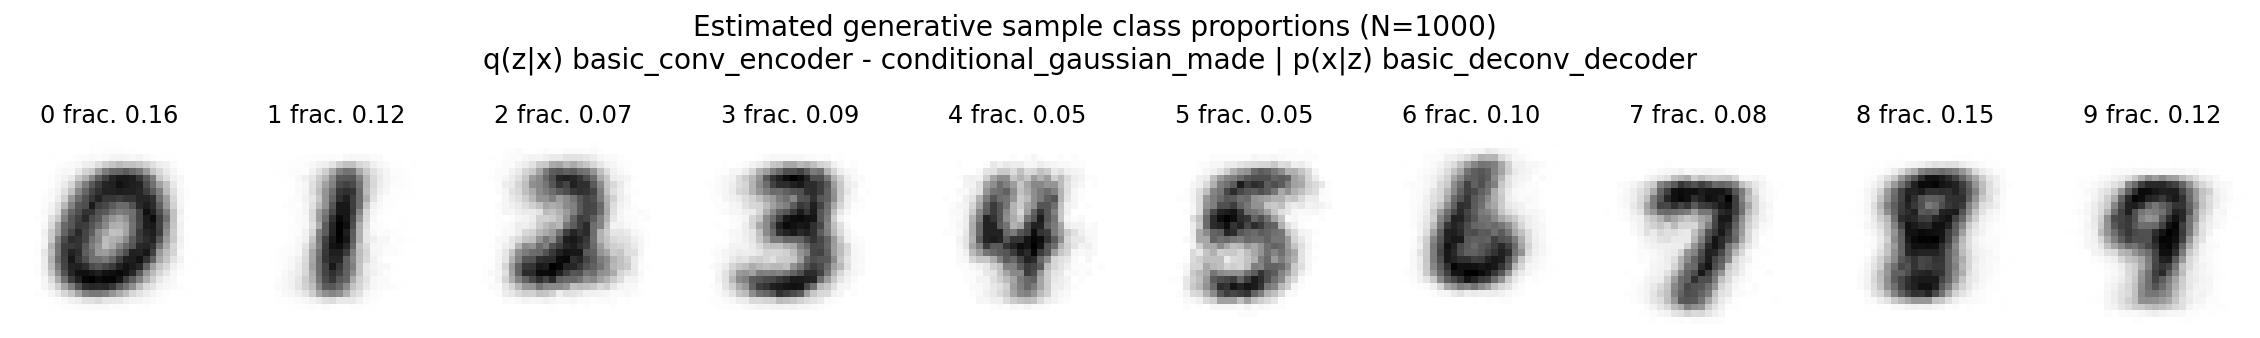

q(z|x) basic_conv_encoder - conditional_gaussian_made | p(x|z) conditional_made_decoder - 2021-09-22-11:11:15.pt
--------------------------------------------------
best val loss 83.44


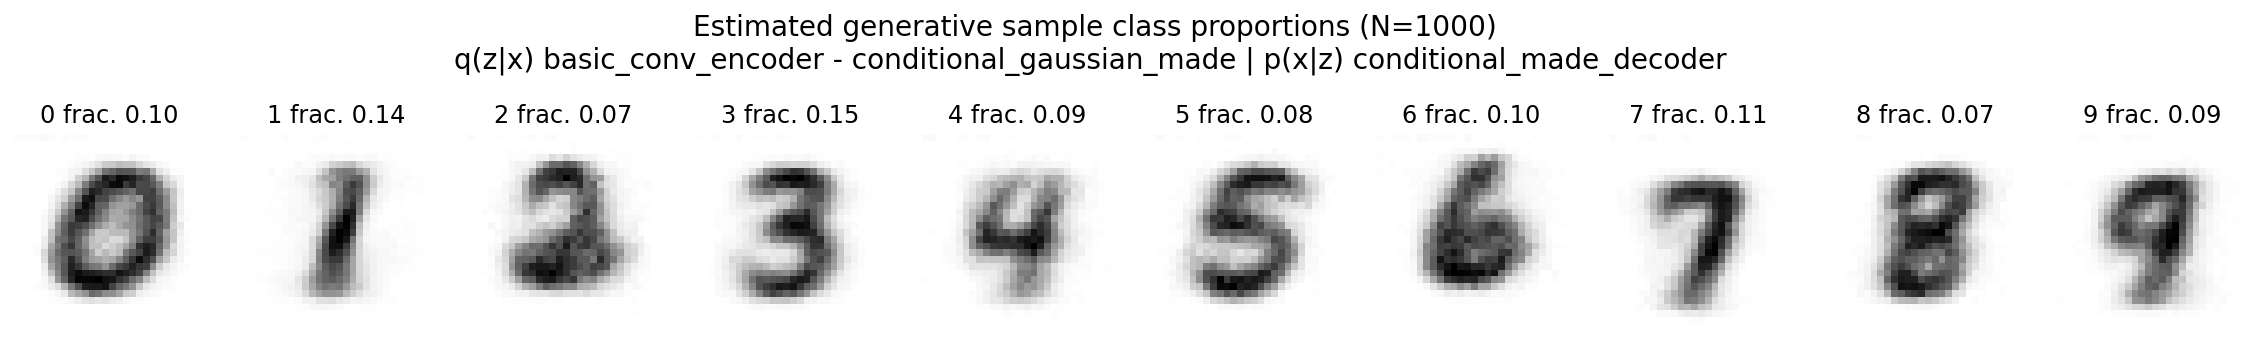

q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_mlp_decoder - 2021-09-22-11:31:20.pt
--------------------------------------------------
best val loss 87.91


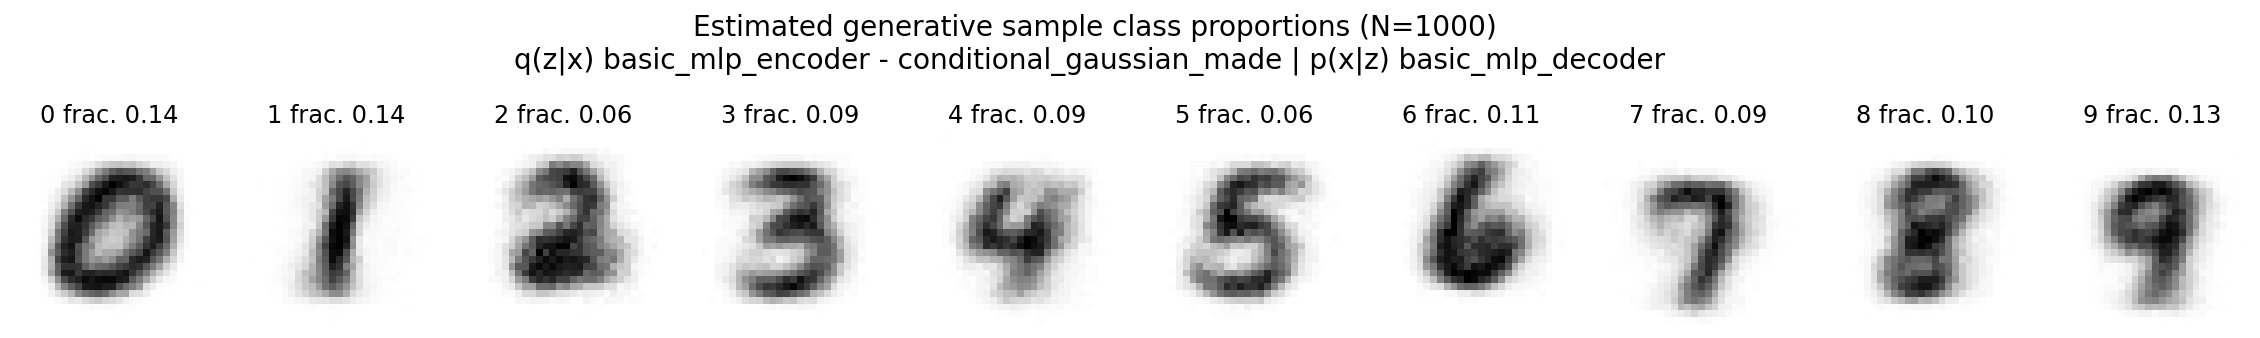

q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) basic_deconv_decoder - 2021-09-22-11:48:20.pt
--------------------------------------------------
best val loss 90.53


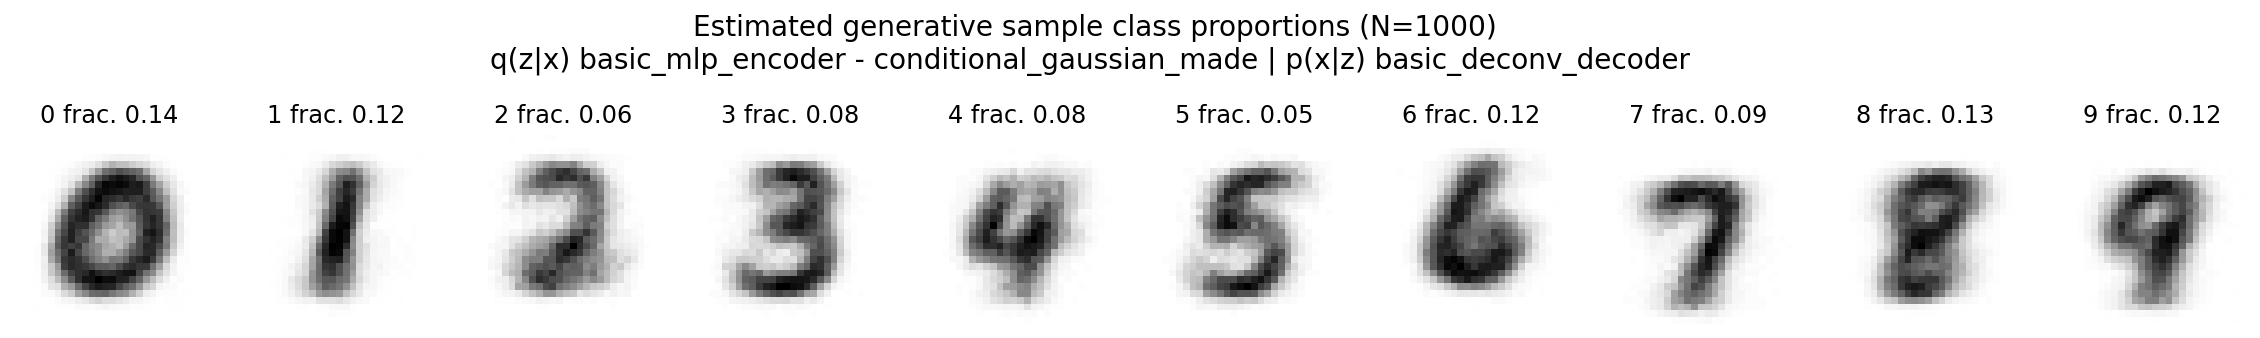

q(z|x) basic_mlp_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
--------------------------------------------------
best val loss 83.59


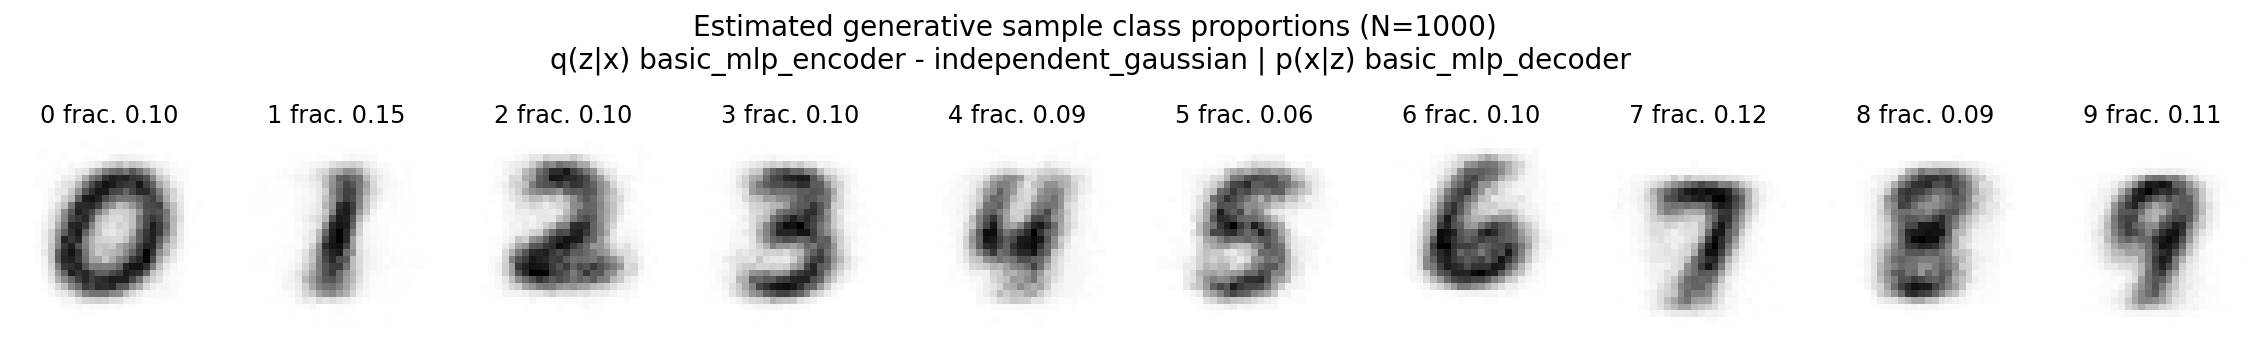

q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_mlp_decoder - 2021-09-22-11:50:42.pt
--------------------------------------------------
best val loss 81.19


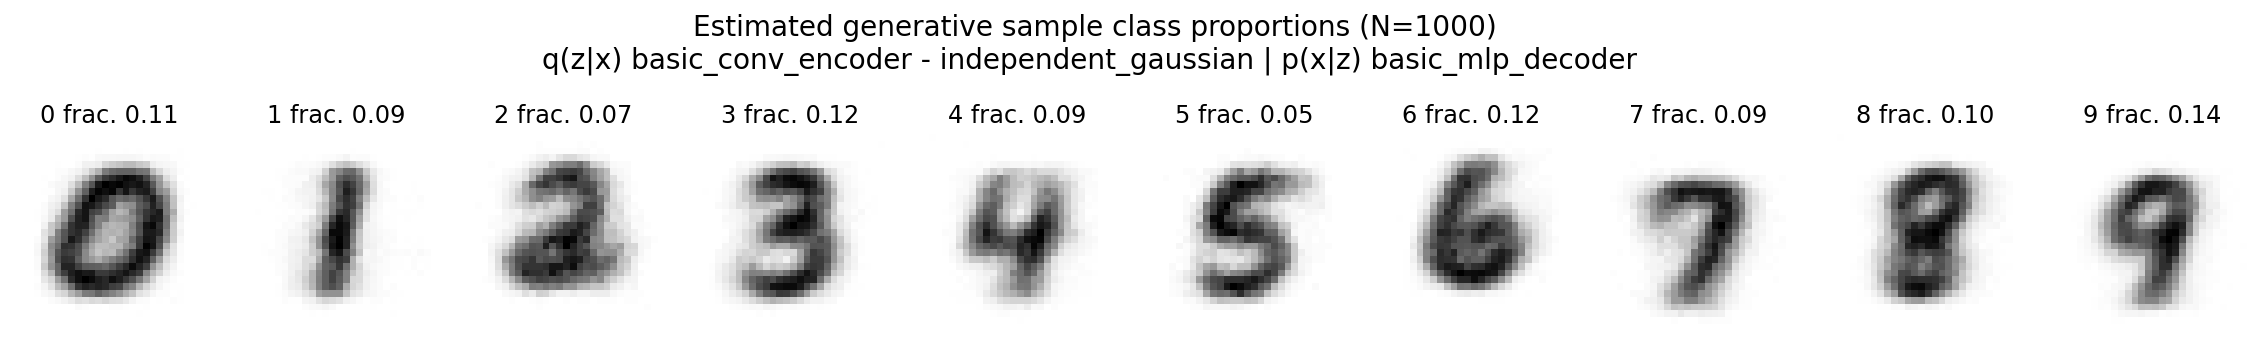

q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) conditional_made_decoder - 2021-09-22-11:50:42.pt
--------------------------------------------------
best val loss 82.23


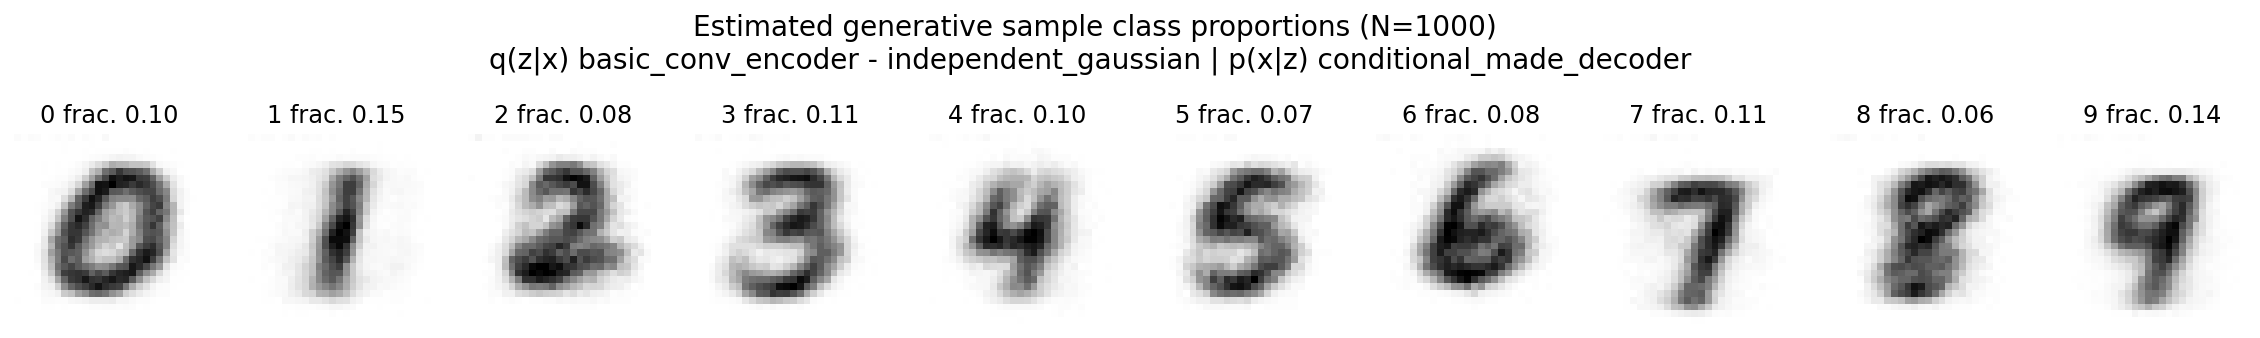

q(z|x) basic_conv_encoder - independent_gaussian | p(x|z) basic_deconv_decoder - 2021-09-22-11:50:42.pt
--------------------------------------------------
best val loss 75.93


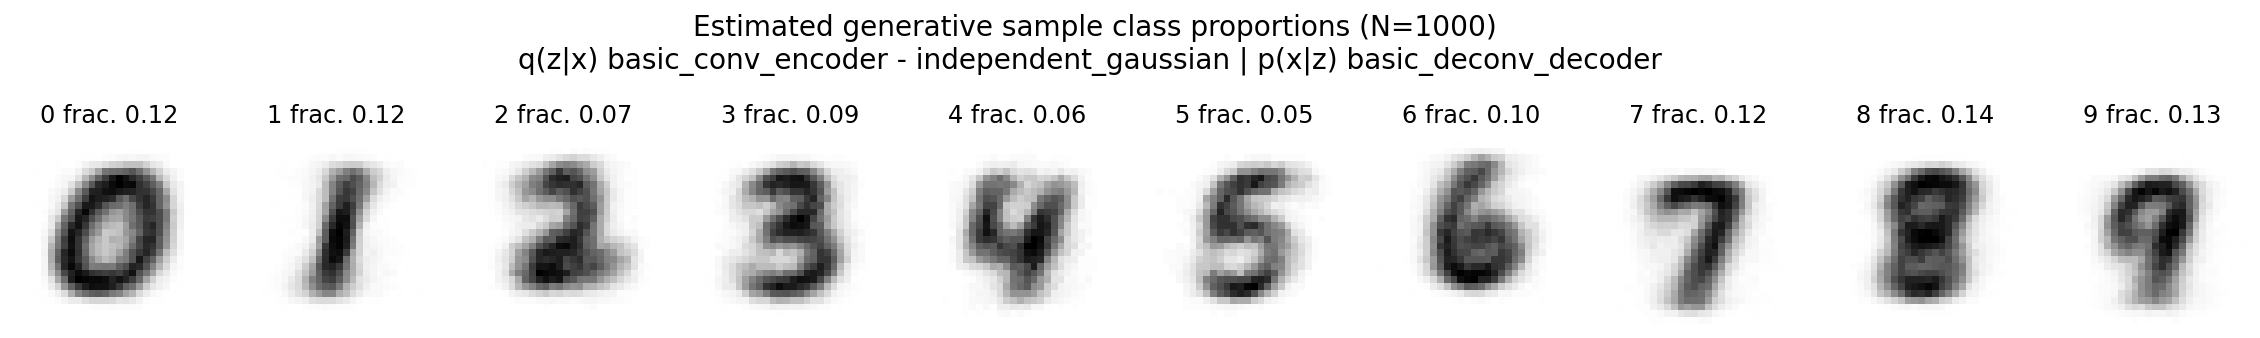

q(z|x) basic_mlp_encoder - conditional_gaussian_made | p(x|z) conditional_made_decoder - 2021-09-22-11:50:42.pt
--------------------------------------------------
best val loss 83.35


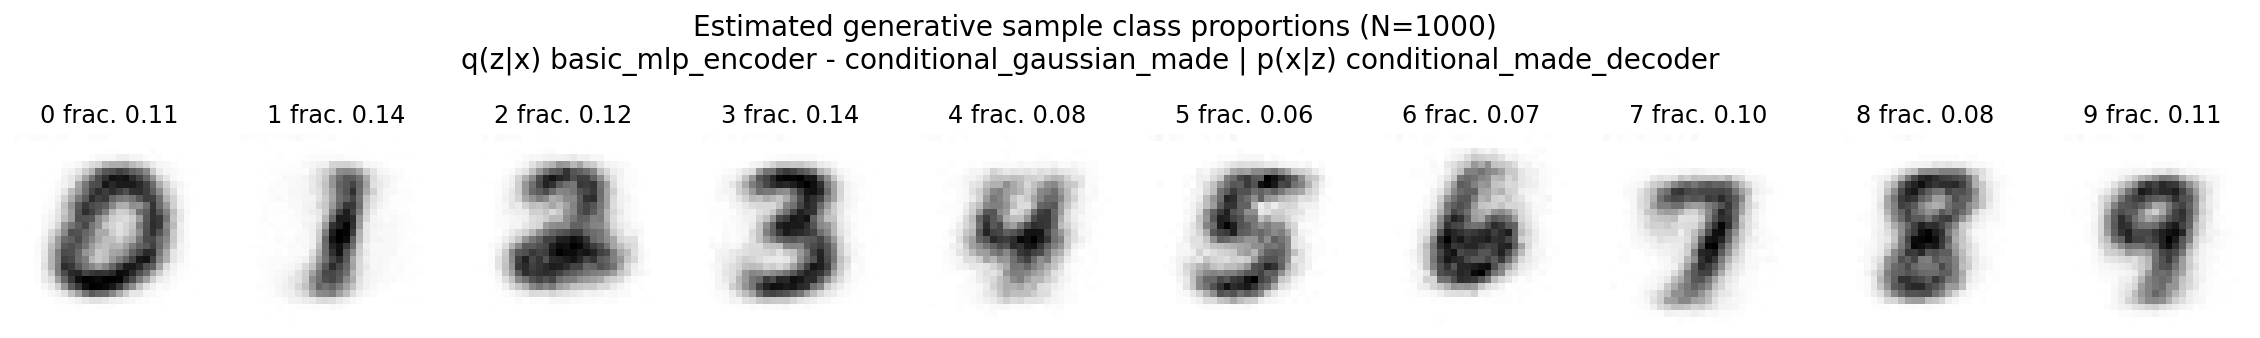

q(z|x) basic_mlp_encoder - independent_gaussian | p(x|z) basic_deconv_decoder - 2021-09-22-12:13:19.pt
--------------------------------------------------
best val loss 80.16


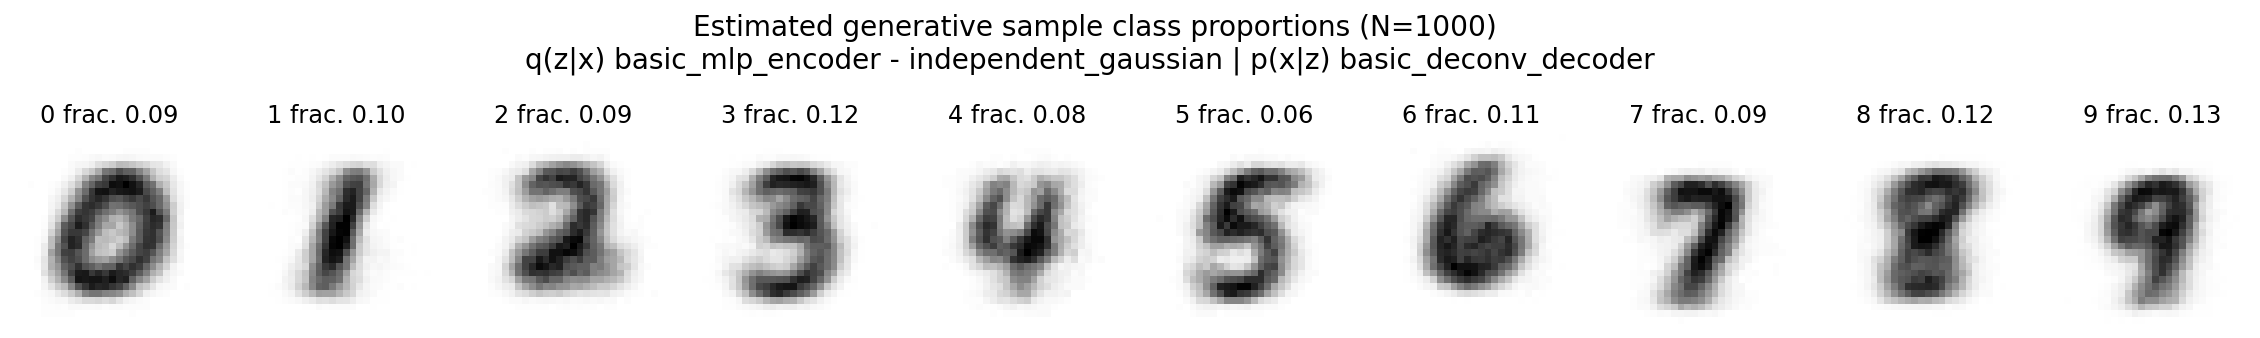

q(z|x) basic_mlp_encoder - independent_gaussian | p(x|z) conditional_made_decoder - 2021-09-22-12:15:36.pt
--------------------------------------------------
total_loss: 82.89 | mmd: 0.07 | elbo: -82.89 | distortion: 56.78 | kl_prior_post: 26.11 | iw_ll: -79.87 | 


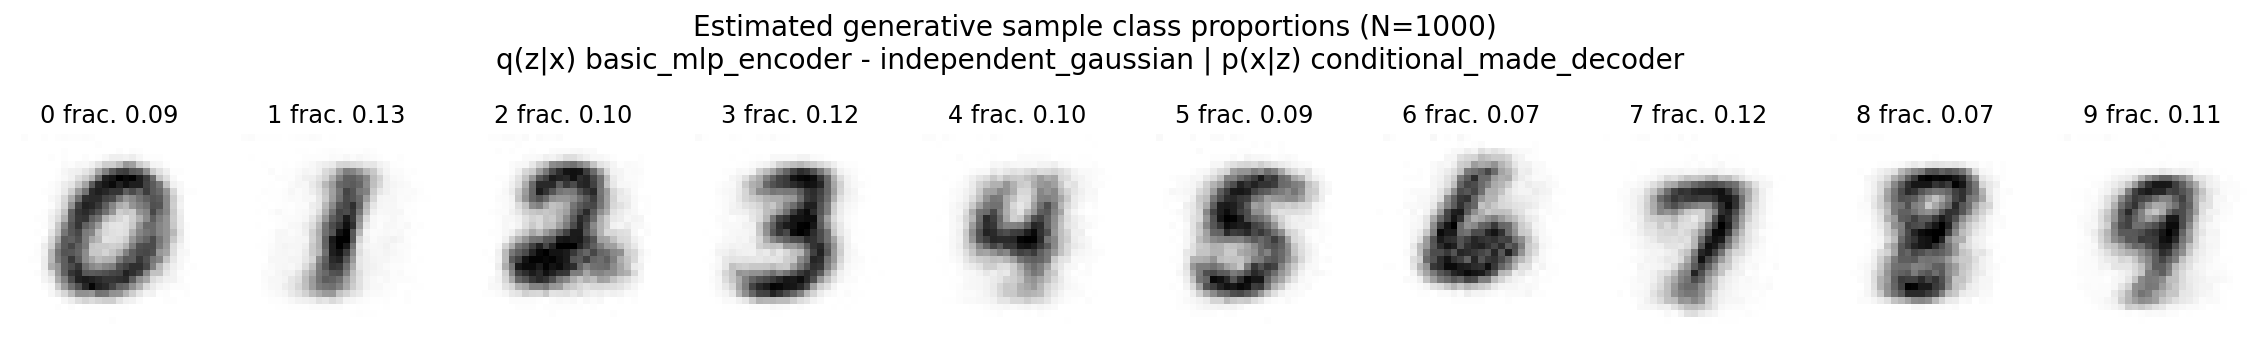

In [8]:
# MAKE PRIOR PROPORTION PLOTS
for C_N in range(12):
    checkpoint_path = f"{checkpoint_dir}/{checkpoint_dict[C_N]}"
    print(checkpoint_dict[C_N])
    print("-"*50)

    vae_model = load_checkpoint_model_for_eval(checkpoint_path)

    clean_name = checkpoint_dict[C_N].split("- 2021")[0]
    plot_gen_sample_class_proportions(vae_model=vae_model, knn_classifier=knn_model, 
                                      n_gen_samples=1000, plot_dir=plot_dir, plot_name=clean_name)
    
    